<a href="https://colab.research.google.com/github/ravindrabharathi/tf_utils/blob/master/test/tf_utils_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Choose tf2 backend on colab

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


### Install tf_utils

In [2]:
!pip install --upgrade git+https://github.com/ravindrabharathi/tf_utils 

  Cloning https://github.com/ravindrabharathi/tf_utils to /tmp/pip-req-build-qburk2q2
  Running command git clone -q https://github.com/ravindrabharathi/tf_utils /tmp/pip-req-build-qburk2q2
  Created wheel for tf-utils: filename=tf_utils-0.1-cp36-none-any.whl size=8410 sha256=57f93a09fc190011514c76b43f58e32284ae1f6c1cffd4ccbd194aaa3f1d1029
  Stored in directory: /tmp/pip-ephem-wheel-cache-h0gqcjtw/wheels/95/af/bb/690b94c65a5aad47a5c39e75f158a2b043448e908c5c121791
Successfully built tf-utils


### import the data module

In [3]:
import tf_utils.data as ds

Finished 'get_cpu_num' in 0.0000 secs


### set batch size

In [0]:
ds.batch_size=128

### downlaod data and create tf records

In [5]:
ds.get_cifar10_and_create_tfrecords()


Finished 'download_file' in 12.9797 secs
Finished 'download_cifar10_files' in 12.9802 secs
Done
Finished 'extract_cifar10_files' in 2.0184 secs
Finished '_get_file_names' in 0.0000 secs
Generating ./train.tfrecords
Finished 'read_pickle_from_file' in 0.1625 secs
Finished 'read_pickle_from_file' in 0.1538 secs
Finished 'read_pickle_from_file' in 0.1396 secs
Finished 'read_pickle_from_file' in 0.1343 secs
Finished 'read_pickle_from_file' in 0.1334 secs
Finished 'convert_to_tfrecord' in 3.1668 secs
Done!
Generating ./eval.tfrecords
Finished 'read_pickle_from_file' in 0.1315 secs
Finished 'convert_to_tfrecord' in 0.6586 secs
Done!
Finished 'create_tf_records' in 3.8268 secs
Finished 'get_cifar10_and_create_tfrecords' in 18.8262 secs


### create train and test dataset

In [6]:
train_ds=ds.get_train_ds()

test_ds=ds.get_eval_ds()

distorting image
Tensor("Shape_2:0", shape=(4,), dtype=int32)
Finished 'get_tf_dataset' in 4.3847 secs
Finished 'get_tf_dataset_in_batches' in 4.3848 secs
Finished 'get_train_ds' in 4.3851 secs
Finished 'get_tf_dataset' in 0.1213 secs
Finished 'get_tf_dataset_in_batches' in 0.1214 secs
Finished 'get_eval_ds' in 0.1215 secs


### import visualization module

In [0]:
import tf_utils.visualize as vz

### plot images from train dataset , train dataset by default uses image augmenttation of cutout,flip-left-right,random-pad-crop 

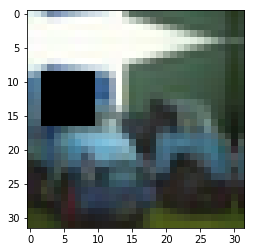

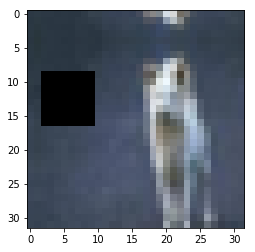

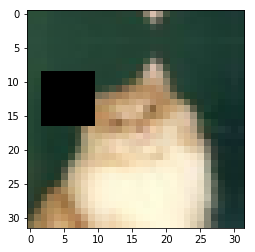

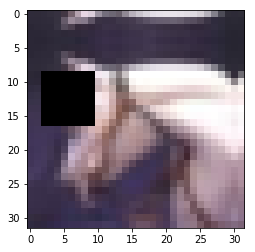

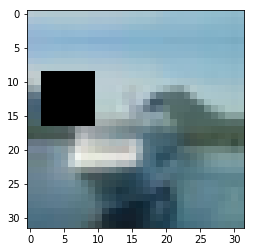

In [8]:
vz.plot_cifar10_files(train_ds)

### Training - Build model , compile and train 

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D,  Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.optimizers import Adam

def conv(inp,f=32,k=3):
  conv_layer=Conv2D(f,k,use_bias=False,padding='same')(inp)
  conv_layer=BatchNormalization()(conv_layer)
  conv_layer=Activation('relu')(conv_layer)
  return conv_layer
  

In [0]:
def build_model():
  inp=Input(shape=(32,32,3))
  layer1=conv(inp,32,3)
  layer2=conv(layer1,32,3)
  mp1=MaxPooling2D(pool_size=(2,2))(layer2)
  layer3=conv(mp1,64,3)
  layer4=conv(layer3,64,3)
  mp2=MaxPooling2D(pool_size=(2,2))(layer4)
  layer5=conv(mp2,128,3)
  layer6=conv(layer5,128,3)
  layer7=Conv2D(10,1,use_bias=False)(layer6)
  layer8=GlobalAveragePooling2D()(layer7)
  out=Activation('softmax')(layer8)
  model=Model(inputs=[inp],outputs=[out])

  return model


In [0]:
model=build_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']
              )

In [12]:
import numpy as np
batch_size=128
model.fit(train_ds,epochs=25, steps_per_epoch=np.ceil(50000/batch_size), 
          validation_data=test_ds, validation_steps=np.ceil(10000/batch_size),
          verbose=1)

Train for 391.0 steps, validate for 79.0 steps
Epoch 1/25
391/391 [==============================] - 18s 47ms/step - loss: 1.3526 - accuracy: 0.5111 - val_loss: 1.5464 - val_accuracy: 0.4656
Epoch 2/25
391/391 [==============================] - 14s 36ms/step - loss: 1.0219 - accuracy: 0.6366 - val_loss: 1.1223 - val_accuracy: 0.6303
Epoch 3/25
391/391 [==============================] - 14s 36ms/step - loss: 0.8953 - accuracy: 0.6814 - val_loss: 0.9815 - val_accuracy: 0.6649
Epoch 4/25
391/391 [==============================] - 14s 36ms/step - loss: 0.8130 - accuracy: 0.7158 - val_loss: 0.9184 - val_accuracy: 0.6879
Epoch 5/25
391/391 [==============================] - 14s 36ms/step - loss: 0.7453 - accuracy: 0.7398 - val_loss: 1.1683 - val_accuracy: 0.6241
Epoch 6/25
391/391 [==============================] - 14s 37ms/step - loss: 0.6941 - accuracy: 0.7580 - val_loss: 1.0465 - val_accuracy: 0.6707
Epoch 7/25
391/391 [==============================] - 14s 36ms/step - loss: 0.6569 - accu

### plot misclassifed images 

79/79 [==============================] - 1s 10ms/step


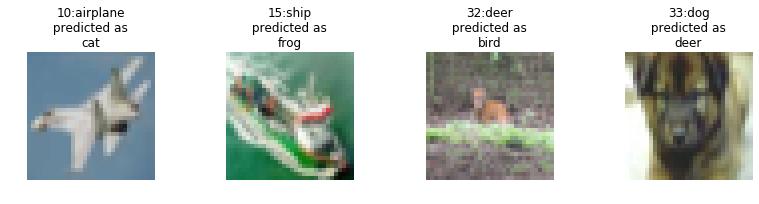

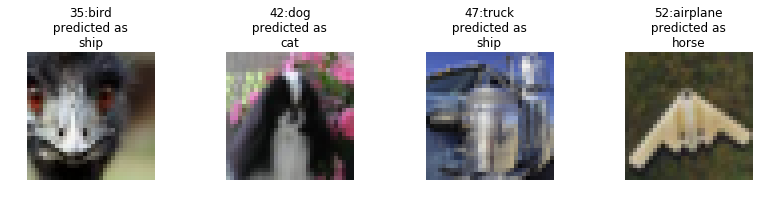

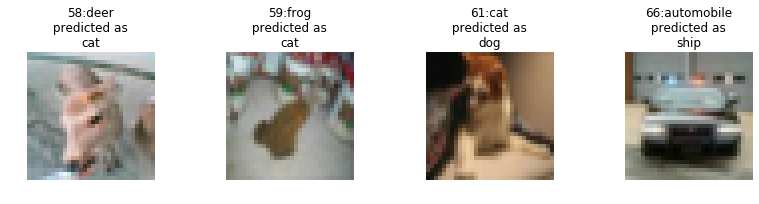

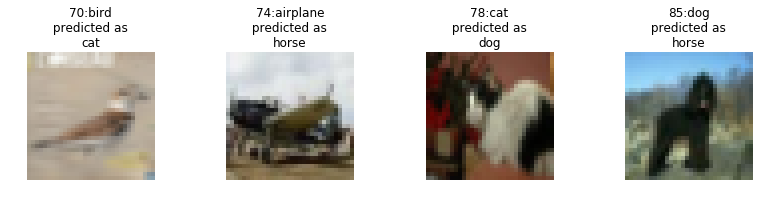

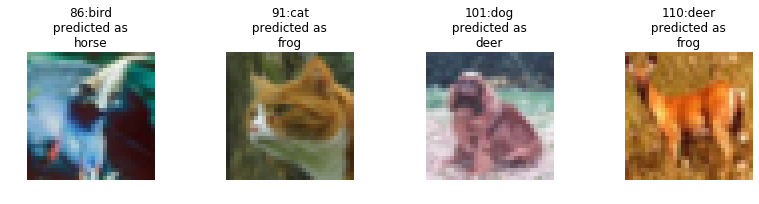

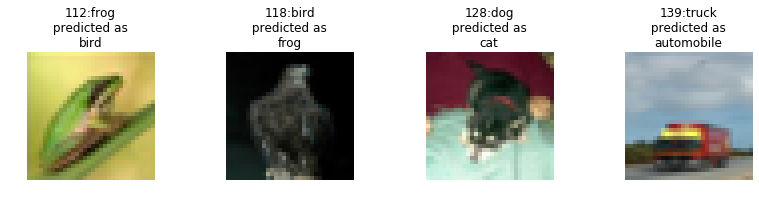

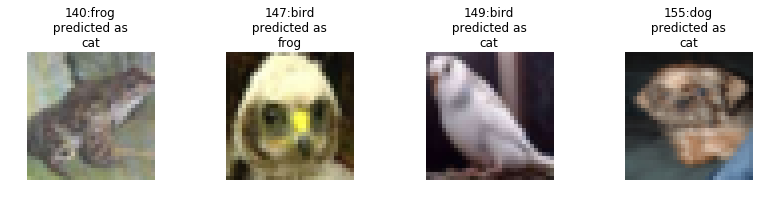

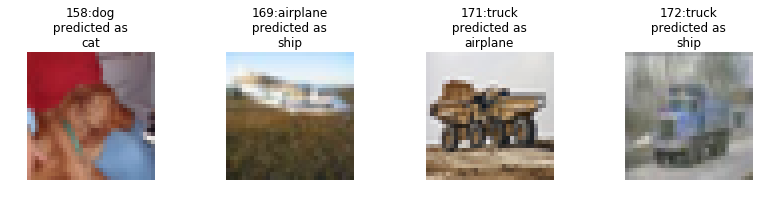

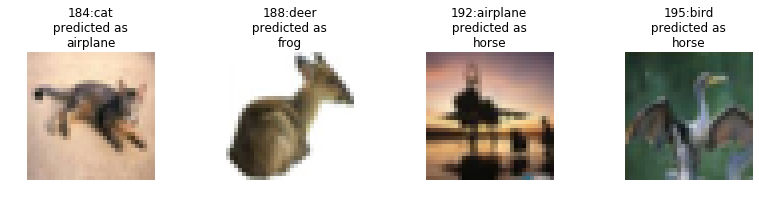

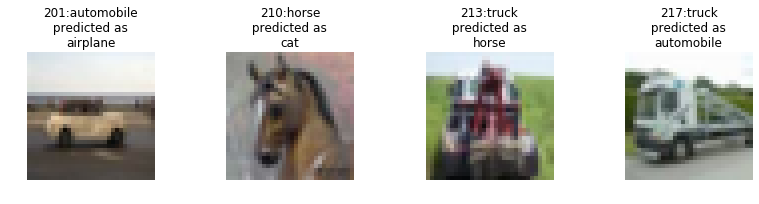

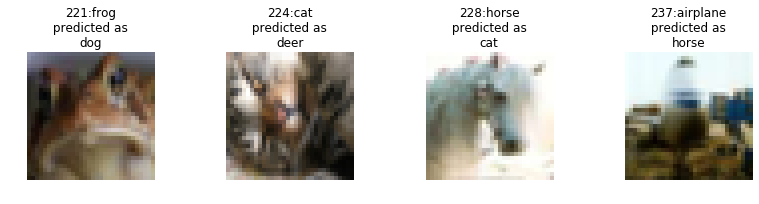

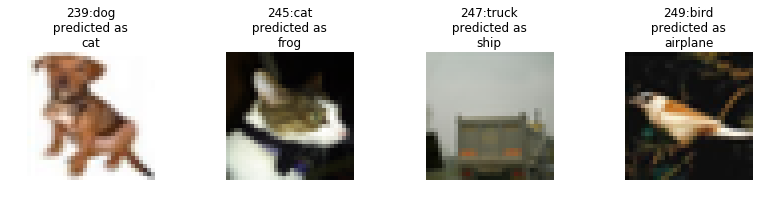

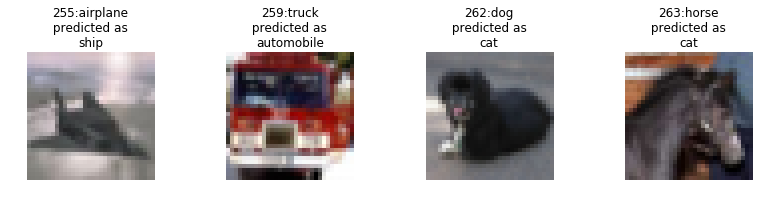

In [13]:
res=vz.get_misclassified_images(model,test_ds)
vz.plot_misclassified_images(res[0],res[1],res[2],res[3],52)

79/79 [==============================] - 1s 10ms/step


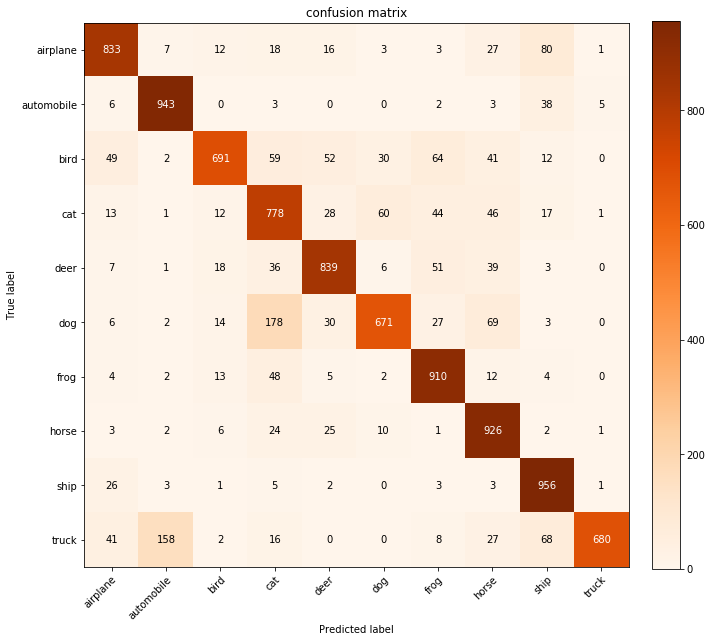

In [14]:
vz.plot_confusion_matrix(model,test_ds)